BI- WEEKLY CHALLENGE(Week 2)

Now is better than never.
Although never is often better than *right* now.
~ Zen of python

This coding exercise is to test your knowledge on what you have learnt so far. You are free to use the internet and any other libraries.
Objective: Build a regressor that recommends the crew member size for potential ship buyers. 
Data

Please do the following steps (hint: use numpy, scipy, pandas, sklearn)
1. Read the file and display columns.
2. Calculate basic statistics of the data (count, mean, std, etc) and examine data and state your  observations.
3. Select columns that will be probably important to predict crew size.
 Create training and testing sets (use 60% of the data for the training and reminder for testing).
4. Build a machine learning model to predict the crew size.
5. Calculate the Pearson correlation coefficient for the training set and testing data sets.
6. Explain Overfitting, and How Can You Avoid It? 
7. What’s the difference between bias and variance?
8. When Will You Use Classification over Regression?

Remark: This is an example of a very straightforward problem. The dataset is clean and small (160 rows and 9 columns), and the instructions are very clear. What is needed is to follow the instructions and generate your code.

Good luck!

Resource
Class notebook


## Introduction

There are 2 categorical features and 7 numerical features. The required python libraries are run in order to use their functions and methods for the Analysis to determine the crew member size.

In [34]:
import numpy as np
import pandas as pd
import scipy as sci
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
ship  = pd.read_csv("C:\\Users\\TOYIN OLAPE\\Documents\\Stutern\\Data Sets\\ship_info.csv")
ship.head()


,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [36]:
ship.shape

(158, 9)

In [37]:
pd.DataFrame({"Unique_Values": ship.nunique(),"Data_type" : ship.dtypes})

,Unique_Values,Data_type
Ship_name,138,object
Cruise_line,20,object
Age,31,int64
Tonnage,94,float64
passengers,104,float64
length,80,float64
cabins,98,float64
passenger_density,109,float64
crew,91,float64


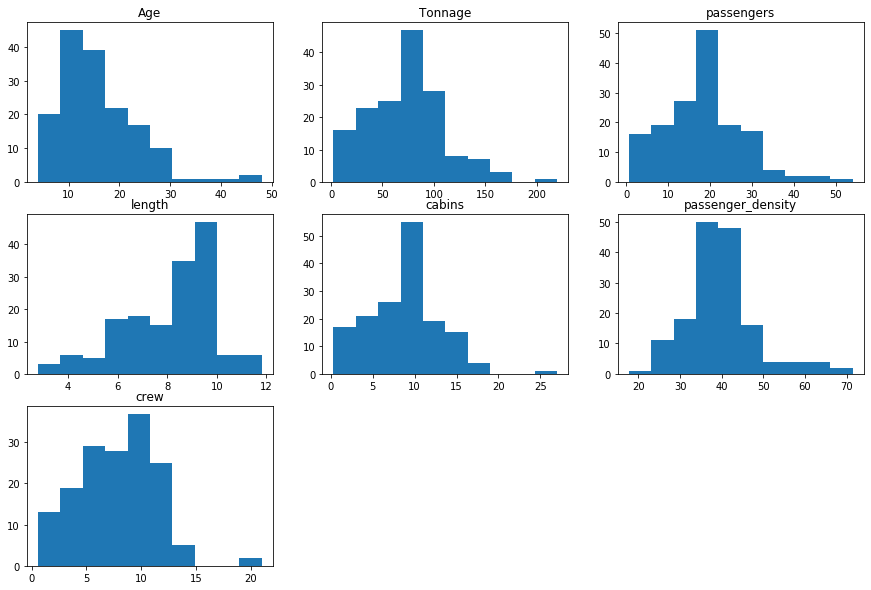

In [42]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
plt.hist(x = ship["Age"])
plt.title("Age")

plt.subplot(3,3,2)
plt.hist(x = ship["Tonnage"])
plt.title("Tonnage")

plt.subplot(3,3,3)
plt.hist(x = ship["passengers"])
plt.title("passengers")

plt.subplot(3,3,4)
plt.hist(x = ship["length"])
plt.title("length")

plt.subplot(3,3,5)
plt.hist(x = ship["cabins"])
plt.title("cabins")

plt.subplot(3,3,6)
plt.hist(x = ship["passenger_density"])
plt.title("passenger_density")

#How do i achieve this with iteration 
plt.subplot(3,3,7)
plt.hist(x = ship["crew"])
plt.title("crew")


plt.show()

In [38]:
ship.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


From the graphical and statistical summary above we can infer the following:

* Age: While average age of the ships is approximately 15 years, we have an age range of 4 - 48 year old ships. I can infer that majority of the ships are below 20 years. 

* Tonnage: The average tonnage a ship can haul is approximately 71.8tonnes, with a range of 2.3 - 90.77 tonnes. I can infer that majority of the ships can carry a tonnage of . 90.7 tonnes.

* Passengers: The average ship can carry 18 passenger, with a range of 1 - 54 passangers. I can infer that majority of the ships can carry 25 passengers and below.

* Length : The average length a ship can haul is approximately 71.8tonnes, with a range of 2.3 - 90.77 tonnes. I can infer that majority of the ships can carry a tonnage of . 90.7 tonnes.

* Cabin: The average tonnage a ship can haul is approximately 71.8tonnes, with a range of 2.3 - 90.77 tonnes. I can infer that majority of the ships can carry a tonnage of . 90.7 tonnes.

* Passenger Density: The average tonnage a ship can haul is approximately 71.8tonnes, with a range of 2.3 - 90.77 tonnes. I can infer that majority of the ships can carry a tonnage of . 90.7 tonnes.


* Passenger Density: The average tonnage a ship can haul is approximately 71.8tonnes, with a range of 2.3 - 90.77 tonnes. I can infer that majority of the ships can carry a tonnage of . 90.7 tonnes.


In [83]:
cat_group1 = ship.groupby(["Cruise_line"])["crew"].count().sort_values(ascending = False)

print(cat_group)

Cruise_line
Royal_Caribbean      23
Carnival             22
Princess             17
Holland_American     14
Norwegian            13
Costa                11
Celebrity            10
MSC                   8
P&O                   6
Star                  6
Regent_Seven_Seas     5
Silversea             4
Cunard                3
Windstar              3
Oceania               3
Seabourn              3
Disney                2
Crystal               2
Azamara               2
Orient                1
Name: crew, dtype: int64


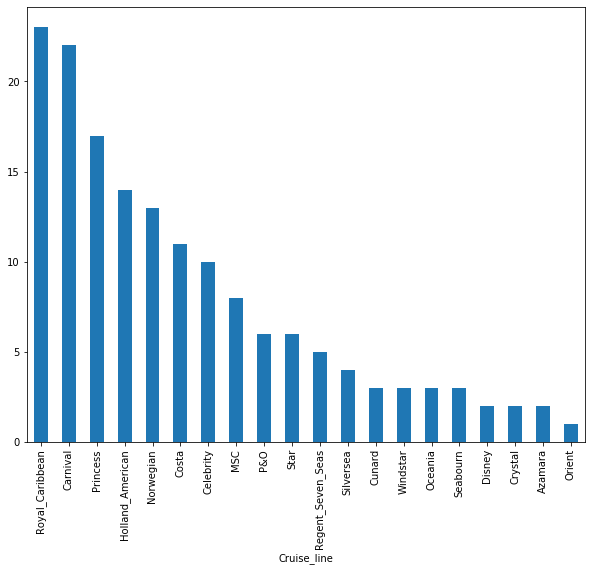

In [84]:
#Plot of the crew size by the ship name or cruise line 

plt.figure(figsize=(10,8))
cat_group.plot(kind='bar',stacked=True)

plt.show()

In [87]:
cat_group2 = ship.groupby(["Ship_name"])["crew"].count().sort_values(ascending = False)

print(cat_group2.head())

Ship_name
Spirit       4
Star         3
Legend       3
Mariner      2
Navigator    2
Name: crew, dtype: int64


Royal Caribean has the most ships under its cruise line while Orient has the least. 4 Ships are named "Spirit" which seems to be the most reoccuring name.

In [67]:
ship_num = ship.select_dtypes(include = ["float","int"]) 
ship_cat = ship.select_dtypes(exclude = ["float","int"]) 

df_num = ship[ship_num.columns]
df_cat = ship[ship_cat.columns]


### Examining the dependent feature(Crew)

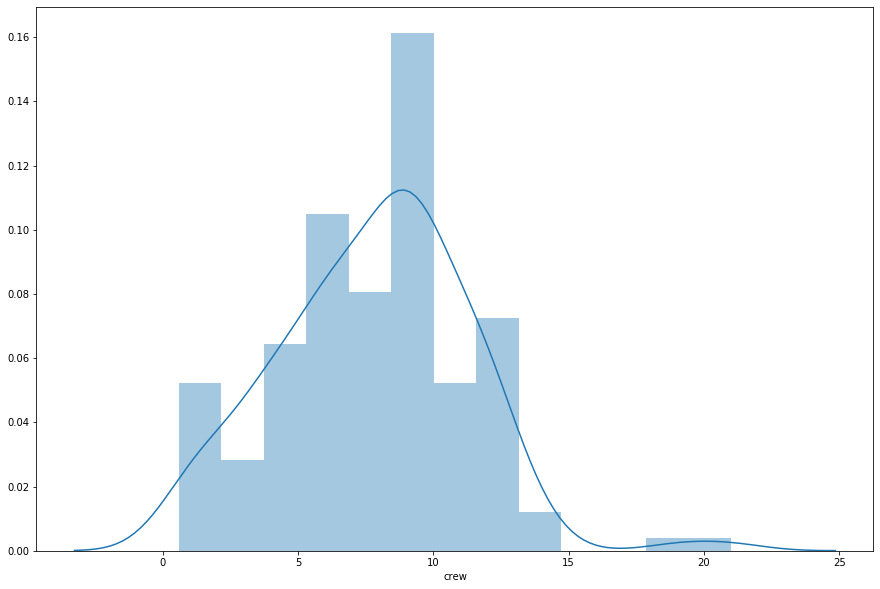

In [60]:
#Bar chart showing the distribution of the crew size
plt.figure(figsize=(15,10))

sns.distplot(ship['crew'])

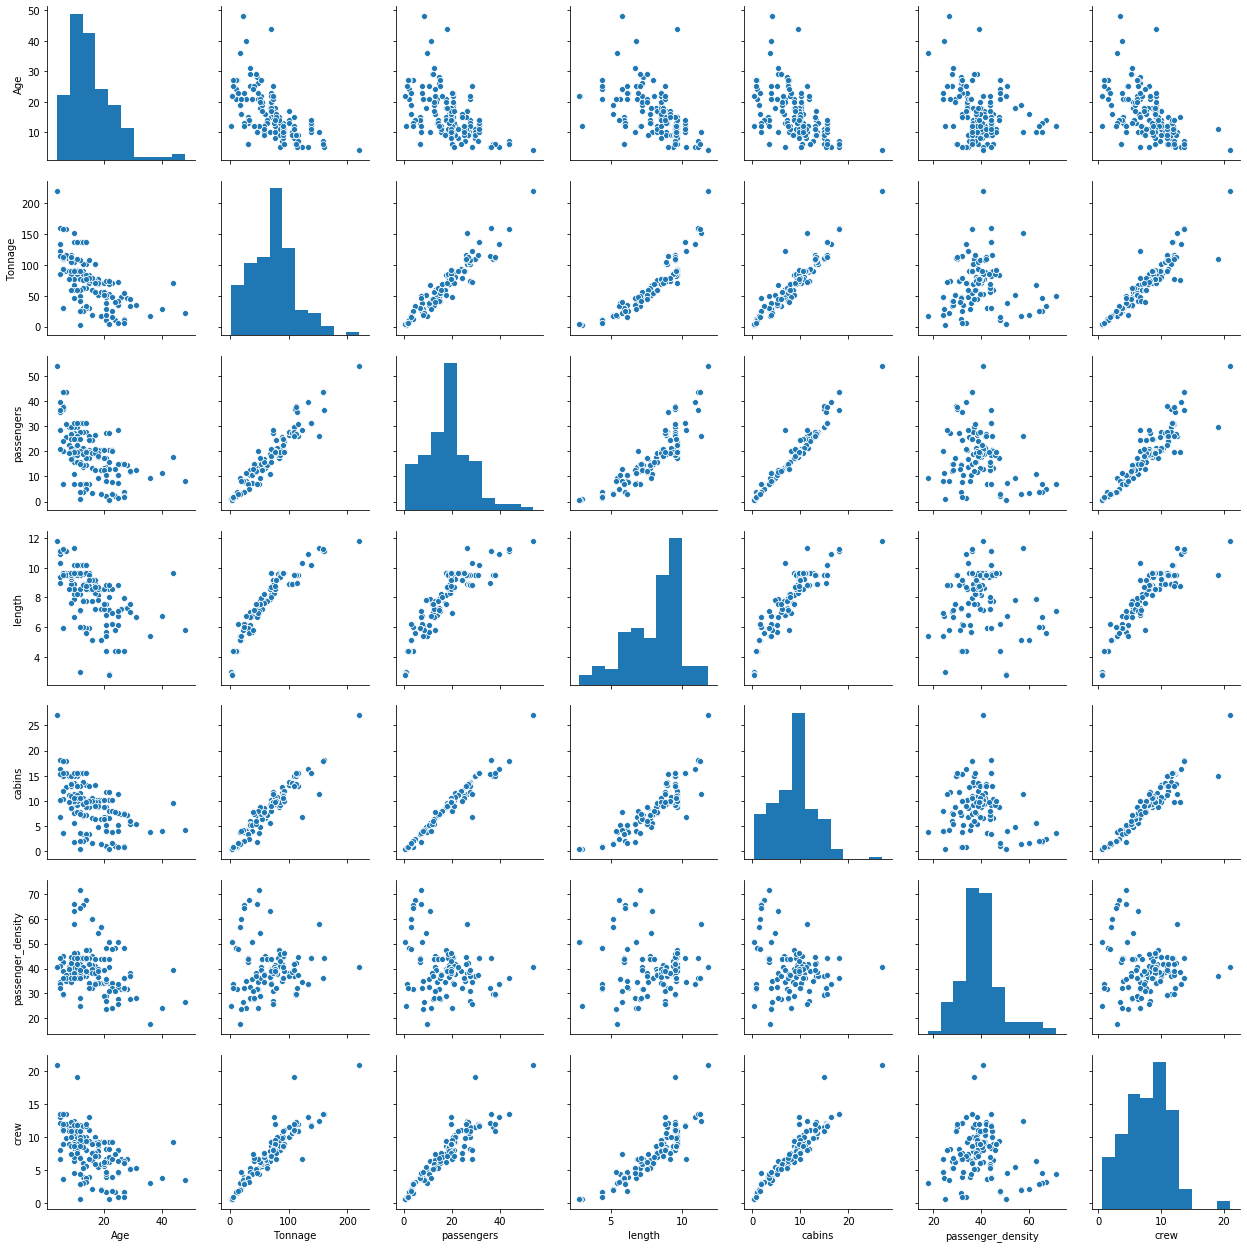

In [24]:
sns.pairplot(ship)

From the pairplot above, the crew feature is strongly positively related to the cabins,length, passenger and tonnage. A correlation matrix would be used to determine the correlation coeffecient. 


In [65]:
corr = ship.corr()
corr.style.background_gradient(cmap="inferno")

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
Age,1,-0.606646,-0.515542,-0.532286,-0.510019,-0.27883,-0.530657
Tonnage,-0.606646,1,0.945061,0.922368,0.948764,-0.0408462,0.927569
passengers,-0.515542,0.945061,1,0.883535,0.976341,-0.294867,0.915234
length,-0.532286,0.922368,0.883535,1,0.889798,-0.0904885,0.895857
cabins,-0.510019,0.948764,0.976341,0.889798,1,-0.253181,0.950823
passenger_density,-0.27883,-0.0408462,-0.294867,-0.0904885,-0.253181,1,-0.155509
crew,-0.530657,0.927569,0.915234,0.895857,0.950823,-0.155509,1


A correlation matrix is used to find the correlation between features. It measures the strength of the relationship between variables and ranges from -1 to 1.

+/-0.7 Strong relationship
+/-0.3 indicates little or no relationship

The correlation heatmap above further affirms the correlation betweeen the dependent feature "crew" and the independent features. With all the independent features except passenger_density and Age having a correlation > 0.8, the 4 features would be considered for the multiple regression.

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [72]:
X = ship[["cabins","length", 'passengers', 'Tonnage']].values
y = ship["crew"].values

reg = LinearRegression()

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
 

R^2: 0.9364397763657831
Root Mean Squared Error: 0.8961289919544145


With a R squared value of 0.93 it means that the features considered predicts the dependent variable up to a 93% accuracy. 

### Overfitting

In Overfitting even when the training data seems to have a high accuracy in prediction, the introduction of a new data set(test data) reveals the reduction of the accuracy and gives high residual values from the best fit line.

An overfitted model would have a Low Bias and High Variance Trade-off.

### Avoiding Overfiftting 

* Using large datasets(train with a training set): if we were to predict the weight of children based on their height in a parrticular school we could have extremely tall children with basket ball player parents (outliers) or children who reach puberty at a later time (randomness) who can affect the accuracy of the model if this model was to be used to predict the weight of children in a different school. If a larger data set is used, it would be possible to reduce the noise from the outliers and generate a better model. 
 
* Cross-validation: Cross-validation is a powerful preventative measure against overfitting. Use your initial training data to generate multiple mini train-test splits. Use these splits to tune your model.In standard k-fold cross-validation, we partition the data into k subsets, called folds. Then, we iteratively train the algorithm on k-1 folds while using the remaining fold as the test set (called the “holdout fold”).
 
* Regularization: Regularization method adds a penalty term for complex models to avoid the risk of overfitting. It is a form of regression which shrinks coefficients of our features towards zero. However, applying regularization to an overly simple model leads to underfitting, a situation where a machine ignores real effects, i.e. signal
 



### DIfference between Bias and Variance 

* Bias are the simplifying assumptions made by a model to make the target function easier to learn.Generally, linear algorithms have a high bias making them fast to learn and easier to understand but generally less flexible. In turn, they have lower predictive performance on complex problems that fail to meet the simplifying assumptions of the algorithms bias
  Bias is the difference between your model's expected predictions and the true values. It is the error of the training data

* Variance is the amount that the estimate of the target function will change if different training data was used.The target function is estimated from the training data by a machine learning algorithm, so we should expect the algorithm to have some variance. Ideally, it should not change too much from one training dataset to the next, meaning that the algorithm is good at picking out the hidden underlying mapping between the inputs and the output variables.
  Variance refers to your algorithm's sensitivity to specific sets of training data. It is the error of the test data 

### When to use Classification over Regression

Classification models are used for prediction of dicrete values which denote an encoded categorical value.A typical classification problem would be determining if a customer will buy a product or not.

Regression models are used for predcition of continous values. A typical regression problem would be determinng the price of a product based on the independent features that are correlated to the dependent feature(price).